In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
csv_path  = "https://raw.githubusercontent.com/Zorug/Projetos_Futuros/master/Ame%20Digital%20-%20Problema/problem1_dataset.csv"
dados = pd.read_csv(csv_path); dados

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.990000,0.0
1,238630912,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,...,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.112581,0.0
2,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,...,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.990000,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.293333,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.330242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180270,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,771.270313,199.990000,1.0
180271,257484236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NAO,NAO,0.0,ESPAGUETEIRA,NAO,193.156933,NaN,0.0
180272,256719114,16.0,NaN,INOX,INOX,NaN,18.5,VEC,NaN,NaN,...,18.5,6.0,NAO,NAO,0.0,CHALEIRA,NAO,436.363021,35.052381,0.0
180273,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,125.988425,105.116593,0.0


In [3]:
tamanho_dataset = dados.shape[0]; tamanho_dataset

180275

In [4]:
def verify_missing_percentage(dados):
    print((dados.isna().sum()/tamanho_dataset).sort_values(ascending=False))

### Basic Preprocessing

In [5]:
len(dados.SESSION_ID.unique()) # Estou tomando essa coluna como irrelevante na análise

145704

In [6]:
dados = dados.drop("SESSION_ID", axis=1)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180275 entries, 0 to 180274
Data columns (total 20 columns):
ITEM_ID              180275 non-null int64
ALTURA               171007 non-null float64
CAPACIDADE_(L)       76671 non-null float64
COMPOSICAO           156978 non-null object
COR                  170251 non-null object
FORMATO              90011 non-null object
LARGURA              171007 non-null float64
MARCA                180001 non-null object
PARA_LAVA_LOUCAS     104086 non-null object
PARA_MICRO_ONDAS     86402 non-null object
PESO                 98524 non-null float64
PROFUNDIDADE         171007 non-null float64
TEMPO_GARANTIA       122770 non-null float64
TEM_FERRO_FUNDIDO    180275 non-null object
TEM_GRELHA           180275 non-null object
TEM_TAMPA            180275 non-null float64
TIPO_PRODUTO         180275 non-null object
TIPO_WOK             180275 non-null object
ITEM_PRICE           167178 non-null float64
INTERESTED           180275 non-null float64
dtype

Arrumando tipos

In [8]:
ind_obj_bool = ["PARA_LAVA_LOUCAS", "PARA_MICRO_ONDAS", "TEM_FERRO_FUNDIDO", "TEM_GRELHA", "TIPO_WOK"]
# dicionário para a conversão
dicionario = {'No':0.0, 'NAO':0.0, 'no':0.0, 'Yes':1.0, 'yes':1.0, 'SIM':1.0}
# aplicando o dicionário no df
for coluna in ind_obj_bool: dados[coluna] = dados[coluna].map(dicionario)

In [9]:
dados.ITEM_ID = dados.ITEM_ID.astype('object')

In [10]:
dados.dtypes

ITEM_ID               object
ALTURA               float64
CAPACIDADE_(L)       float64
COMPOSICAO            object
COR                   object
FORMATO               object
LARGURA              float64
MARCA                 object
PARA_LAVA_LOUCAS     float64
PARA_MICRO_ONDAS     float64
PESO                 float64
PROFUNDIDADE         float64
TEMPO_GARANTIA       float64
TEM_FERRO_FUNDIDO    float64
TEM_GRELHA           float64
TEM_TAMPA            float64
TIPO_PRODUTO          object
TIPO_WOK             float64
ITEM_PRICE           float64
INTERESTED           float64
dtype: object

### Reagrupamento de dados

In [11]:
# Temos os seguintes grupos: categóricas, dimensões, booleanas e outras
categoricas = ["ITEM_ID", "COMPOSICAO", "COR", "FORMATO", "MARCA", "TIPO_PRODUTO"]
dimensoes = ["ALTURA", "CAPACIDADE_(L)", "LARGURA", "PROFUNDIDADE"]
booleanas = ["PARA_LAVA_LOUCAS", "PARA_MICRO_ONDAS", "TEM_FERRO_FUNDIDO", "TEM_GRELHA", "TEM_TAMPA", "TIPO_WOK", "INTERESTED"]
outras = ["PESO", "TEMPO_GARANTIA", "ITEM_PRICE"]

In [12]:
colunas_dados = categoricas + dimensoes + outras + booleanas
dados = dados[colunas_dados]; dados.sample(5)

,ITEM_ID,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
161074,256587172,ALUMINIO,VERMELHO,REDONDO,BRINOX,WOK,11.5,NaN,30.5,45.0,NaN,NaN,184.130000,NaN,NaN,0.0,0.0,1.0,1.0,0.0
51216,264220456,ALUMINIO,VINHO,NaN,LA CUISINE,PANELA,30.5,NaN,14.0,50.0,NaN,3.0,199.990000,NaN,NaN,0.0,1.0,1.0,0.0,0.0
171861,259620238,NaN,PRETO,REDONDO,FUMIL,FRIGIDEIRA,19.0,NaN,32.0,50.0,NaN,NaN,79.990000,NaN,NaN,1.0,0.0,1.0,0.0,0.0
178001,239456822,ALUMINIO,GRAFITE,REDONDO,LA CUISINE,PANELA,9.0,1.85,21.0,38.5,140.0,1.0,59.990000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
176011,227368822,ALUMINIO,CEREJA,REDONDO,TRAMONTINA,PANELA,42.7,4.50,32.7,18.1,160.0,12.0,95.660294,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Análise Exploratória

In [13]:
len(dados.ITEM_ID.unique())

787

In [14]:
# Escolha de um grupo aleatório para ID
ID_groups = dados.ITEM_ID.unique()
grupo = np.random.choice(ID_groups)
random_group = dados.ITEM_ID == grupo
tamanho = len(dados[random_group])
dados[random_group] # escolhe grupo aleatóriamente

,ITEM_ID,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
215,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
334,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,38.891961,NaN,NaN,1.0,0.0,0.0,0.0,0.0
723,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1265,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
1286,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179547,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,1.0
179660,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,0.0
179871,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,38.823333,NaN,NaN,1.0,0.0,0.0,0.0,0.0
179955,259733592,NaN,PRETO,NaN,PANELA MINEIRA,CACAROLA,28.0,NaN,37.0,40.0,NaN,NaN,39.990000,NaN,NaN,1.0,0.0,0.0,0.0,1.0


In [15]:
dados.isna().sum()

ITEM_ID                   0
COMPOSICAO            23297
COR                   10024
FORMATO               90264
MARCA                   274
TIPO_PRODUTO              0
ALTURA                 9268
CAPACIDADE_(L)       103604
LARGURA                9268
PROFUNDIDADE           9268
PESO                  81751
TEMPO_GARANTIA        57505
ITEM_PRICE            13097
PARA_LAVA_LOUCAS      76189
PARA_MICRO_ONDAS      93873
TEM_FERRO_FUNDIDO         0
TEM_GRELHA                0
TEM_TAMPA                 0
TIPO_WOK                  0
INTERESTED                0
dtype: int64

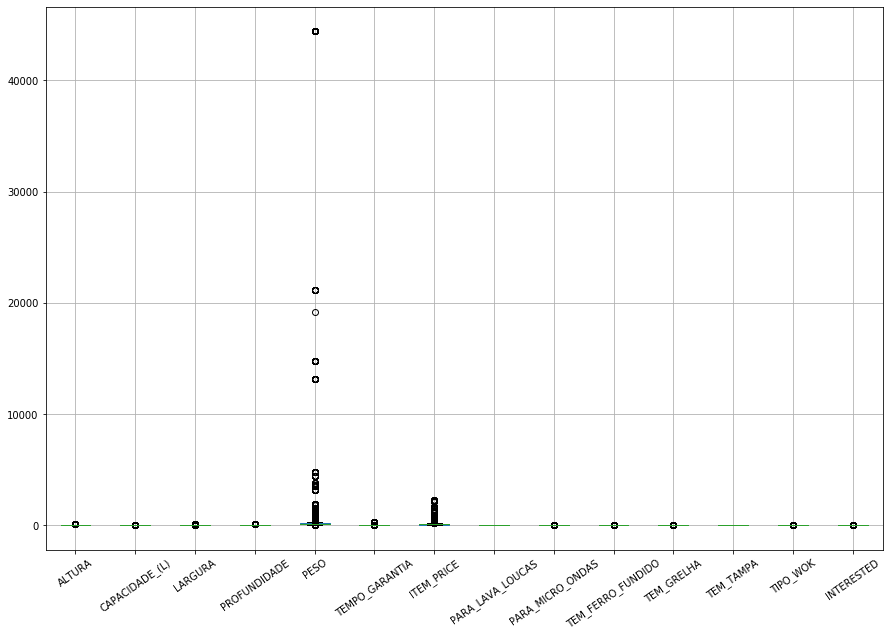

In [16]:
dados.boxplot(figsize = (15,10), rot=35)

### Estudo do peso

In [17]:
dados.PESO.describe(percentiles=[.01, .5, .99])

count    98524.000000
mean       311.259118
std       1727.585999
min          0.619000
1%           0.619000
50%        160.000000
99%       1270.000000
max      44400.000000
Name: PESO, dtype: float64

In [18]:
dados.COMPOSICAO.unique()

array(['ALUMINIO', 'INOX', nan, 'CERAMICA', 'PORCELANA', 'ACO ESMALTADO'],
      dtype=object)

In [19]:
#dados.PESO[dados.PESO.notna()]

In [20]:
X = np.array(dados.PESO[dados.PESO.notna()]); X

array([150., 190., 120., ..., 120.,  20., 120.])

In [84]:
grupo = dados.groupby(['TIPO_PRODUTO','COMPOSICAO'])

In [117]:
peso_medio = grupo['PESO'].mean().round(3); peso_medio
peso_medio = pd.DataFrame(peso_medio).reset_index(); peso_medio
#peso_medio = peso_medio.set_index('TIPO_PRODUTO'); peso_medio

,TIPO_PRODUTO,COMPOSICAO,PESO
0,BISTEQUEIRA,ALUMINIO,482.000
1,BULE,INOX,230.000
2,BULE,PORCELANA,600.000
3,CACAROLA,ACO ESMALTADO,396.000
4,CACAROLA,ALUMINIO,2210.077
5,CACAROLA,CERAMICA,142.163
6,CACAROLA,INOX,384.549
7,CACAROLA,PORCELANA,574.000
8,CALDEIRAO,ALUMINIO,0.937
9,CALDEIRAO,INOX,294.521


Text(0.5, 1.0, 'Distribuição dos pesos médios dos produtos')

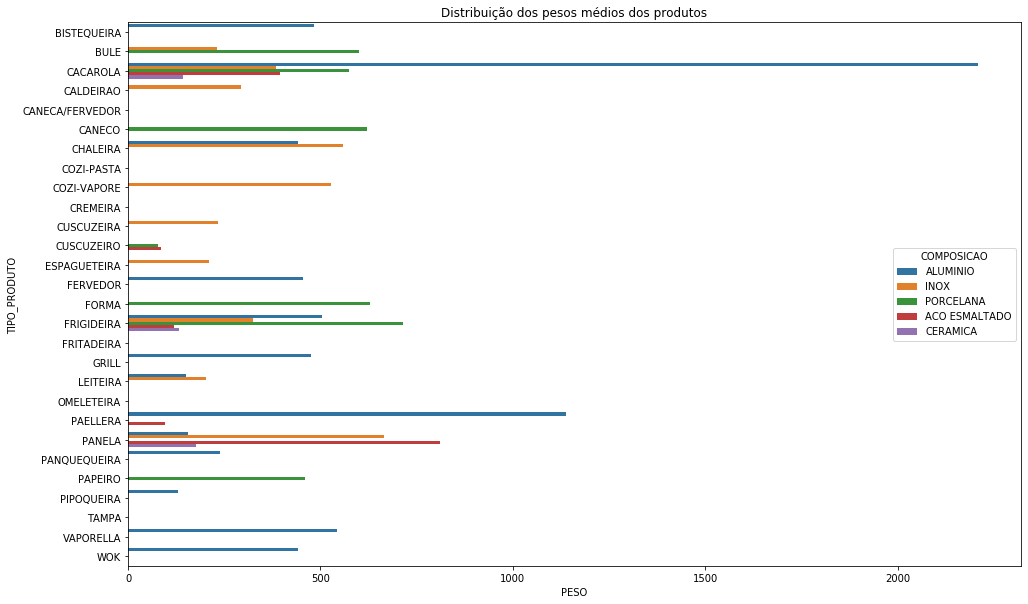

In [149]:
plt.figure(figsize=(16,10))
ax = sns.barplot(y='TIPO_PRODUTO', x='PESO', hue='COMPOSICAO', data=peso_medio)
ax.set_title("Distribuição dos pesos médios dos produtos")